# Analysis of Balancer, SocialFi Alliance, and Saber Treasury Swaps + Mango Markets Diversification Strategy

## Data Pre-Processing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Scalyr Daily Prices - For Castle.csv', index_col='date')
df.index = df.index.map(pd.to_datetime)
df.head()

,AAVE,BAL,BTC,DHT,DODO,GHST,GNO,MASK,MATIC,MTA,POOL,PRIME,QUICK,REP,SOL,SUSHI,TRIBE
date,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,7181.34,NaN,NaN,NaN,11.28,NaN,0.01,NaN,NaN,NaN,NaN,8.62,NaN,NaN,NaN
2020-01-02,NaN,NaN,6947.97,NaN,NaN,NaN,10.64,NaN,0.01,NaN,NaN,NaN,NaN,8.48,NaN,NaN,NaN
2020-01-03,NaN,NaN,7334.64,NaN,NaN,NaN,10.99,NaN,0.02,NaN,NaN,NaN,NaN,8.82,NaN,NaN,NaN
2020-01-04,NaN,NaN,7342.93,NaN,NaN,NaN,11.09,NaN,0.01,NaN,NaN,NaN,NaN,9.07,NaN,NaN,NaN
2020-01-05,NaN,NaN,7353.34,NaN,NaN,NaN,11.13,NaN,0.01,NaN,NaN,NaN,NaN,9.33,NaN,NaN,NaN


## Balancer Treasury Analysis Post-Swap

In [3]:
df_bal = df[["BAL", "MTA", "TRIBE", "GNO", "AAVE"]]
df_bal.head()

,BAL,MTA,TRIBE,GNO,AAVE
date,,,,,
2020-01-01,NaN,NaN,NaN,11.28,NaN
2020-01-02,NaN,NaN,NaN,10.64,NaN
2020-01-03,NaN,NaN,NaN,10.99,NaN
2020-01-04,NaN,NaN,NaN,11.09,NaN
2020-01-05,NaN,NaN,NaN,11.13,NaN


In [4]:
df_bal = df_bal.dropna()
df_bal.head()

,BAL,MTA,TRIBE,GNO,AAVE
date,,,,,
2021-04-03,56.64,3.06,2.18,168.13,379.66
2021-04-04,59.10,3.07,2.19,170.02,403.60
2021-04-05,59.75,3.09,1.82,175.02,398.29
2021-04-06,57.53,2.93,1.71,170.85,383.19
2021-04-07,50.33,2.44,1.47,160.56,348.91


### Balancer <> Fei Swap 11/9/21

In [42]:
df_bal_0 = df_bal[['BAL', 'TRIBE']]
df_bal_0.head()

,BAL,TRIBE
date,,
2021-04-03,56.64,2.18
2021-04-04,59.10,2.19
2021-04-05,59.75,1.82
2021-04-06,57.53,1.71
2021-04-07,50.33,1.47


In [43]:
df_bal_0 = df_bal_0['2021-04-03':'2021-11-09']
df_bal_0.tail()

,BAL,TRIBE
date,,
2021-11-05,26.97,1.08
2021-11-06,26.15,1.10
2021-11-07,26.13,1.12
2021-11-08,26.66,1.13
2021-11-09,26.35,1.15


In [45]:
# shift moves dates back by 1
df_bal_0_change = df_bal_0.apply(lambda x: np.log(x) - np.log(x.shift(1)))
df_bal_0_change.head()

,BAL,TRIBE
date,,
2021-04-03,NaN,NaN
2021-04-04,0.042515,0.004577
2021-04-05,0.010938,-0.185065
2021-04-06,-0.037863,-0.062343
2021-04-07,-0.133705,-0.151231


/var/folders/6t/n290005x0hj3wffzdhtcr4rr0000gn/T/ipykernel_31166/1523467920.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

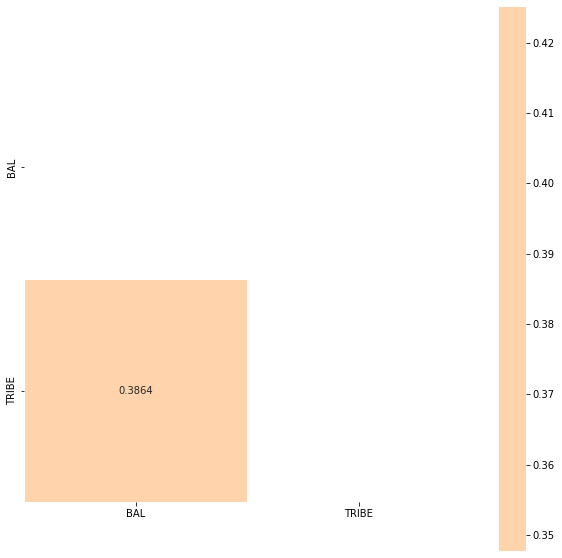

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_bal_0_change.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

### Balancer <> mStable 12/01/21

In [47]:
df_bal_1 = df_bal[['BAL', 'TRIBE', 'MTA']]
df_bal_1.head()

,BAL,TRIBE,MTA
date,,,
2021-04-03,56.64,2.18,3.06
2021-04-04,59.10,2.19,3.07
2021-04-05,59.75,1.82,3.09
2021-04-06,57.53,1.71,2.93
2021-04-07,50.33,1.47,2.44


In [48]:
df_bal_1 = df_bal_1['2021-04-03':'2021-12-01']
df_bal_1.tail()

,BAL,TRIBE,MTA
date,,,
2021-11-27,19.77,0.94,1.47
2021-11-28,20.67,0.93,1.47
2021-11-29,20.97,1.10,1.52
2021-11-30,21.11,1.20,1.44
2021-12-01,20.68,1.14,1.39


In [49]:
# shift moves dates back by 1
df_bal_1_change = df_bal_1.apply(lambda x: np.log(x) - np.log(x.shift(1)))
df_bal_1_change.head()

,BAL,TRIBE,MTA
date,,,
2021-04-03,NaN,NaN,NaN
2021-04-04,0.042515,0.004577,0.003263
2021-04-05,0.010938,-0.185065,0.006494
2021-04-06,-0.037863,-0.062343,-0.053169
2021-04-07,-0.133705,-0.151231,-0.183004


/var/folders/6t/n290005x0hj3wffzdhtcr4rr0000gn/T/ipykernel_31166/2295681072.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

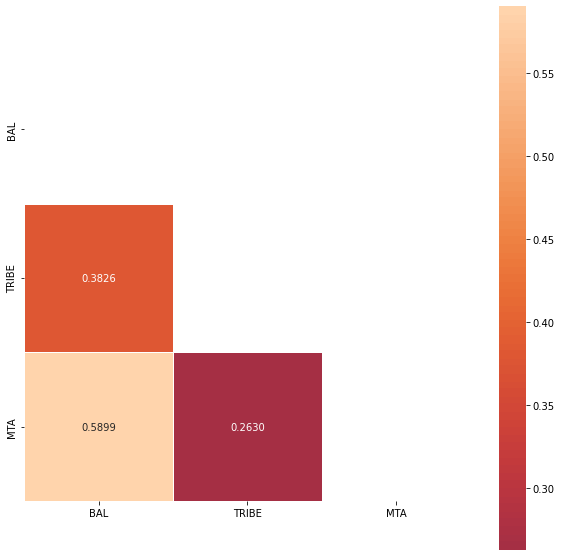

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_bal_1_change.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

### Balancer <> GnosisDAO 1/25/2022

In [52]:
df_bal_2 = df_bal[['BAL', 'TRIBE', 'MTA', 'GNO']]
df_bal_2.head()

,BAL,TRIBE,MTA,GNO
date,,,,
2021-04-03,56.64,2.18,3.06,168.13
2021-04-04,59.10,2.19,3.07,170.02
2021-04-05,59.75,1.82,3.09,175.02
2021-04-06,57.53,1.71,2.93,170.85
2021-04-07,50.33,1.47,2.44,160.56


In [53]:
# shift moves dates back by 1
df_bal_2_change = df_bal_2.apply(lambda x: np.log(x) - np.log(x.shift(1)))
df_bal_2_change.head()

,BAL,TRIBE,MTA,GNO
date,,,,
2021-04-03,NaN,NaN,NaN,NaN
2021-04-04,0.042515,0.004577,0.003263,0.011179
2021-04-05,0.010938,-0.185065,0.006494,0.028984
2021-04-06,-0.037863,-0.062343,-0.053169,-0.024114
2021-04-07,-0.133705,-0.151231,-0.183004,-0.062118


/var/folders/6t/n290005x0hj3wffzdhtcr4rr0000gn/T/ipykernel_31166/2306682141.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

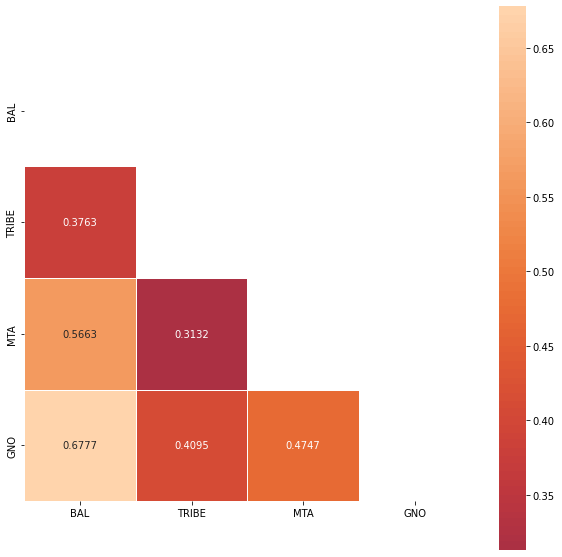

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_bal_2_change.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

### Total Portfolio Correlations Including Aave as of writing

In [5]:
import numpy as np
# shift moves dates back by 1
df_bal_change = df_bal.apply(lambda x: np.log(x) - np.log(x.shift(1)))
df_bal_change.head()

,BAL,MTA,TRIBE,GNO,AAVE
date,,,,,
2021-04-03,NaN,NaN,NaN,NaN,NaN
2021-04-04,0.042515,0.003263,0.004577,0.011179,0.061148
2021-04-05,0.010938,0.006494,-0.185065,0.028984,-0.013244
2021-04-06,-0.037863,-0.053169,-0.062343,-0.024114,-0.038649
2021-04-07,-0.133705,-0.183004,-0.151231,-0.062118,-0.093717


In [6]:
df_bal_change.shape

(363, 5)

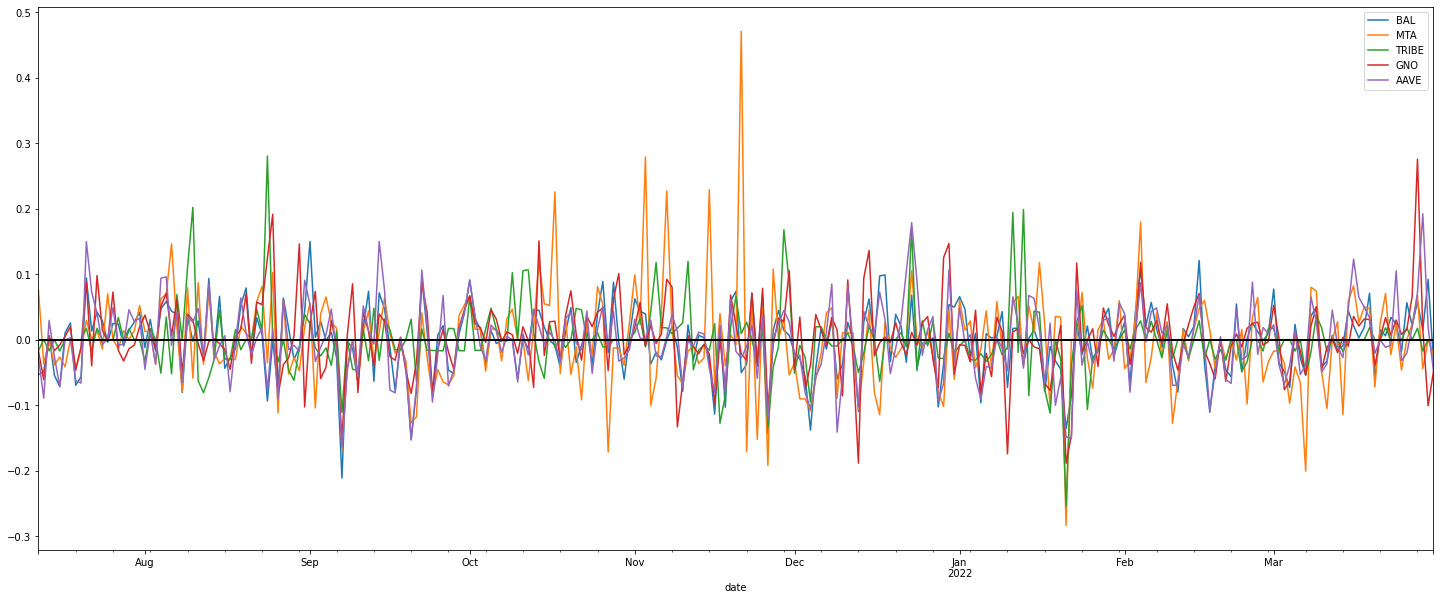

In [7]:
df_bal_change[100:363].plot(figsize=(25, 10)).axhline(color='black', linewidth=2)

/var/folders/6t/n290005x0hj3wffzdhtcr4rr0000gn/T/ipykernel_31166/1729692987.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

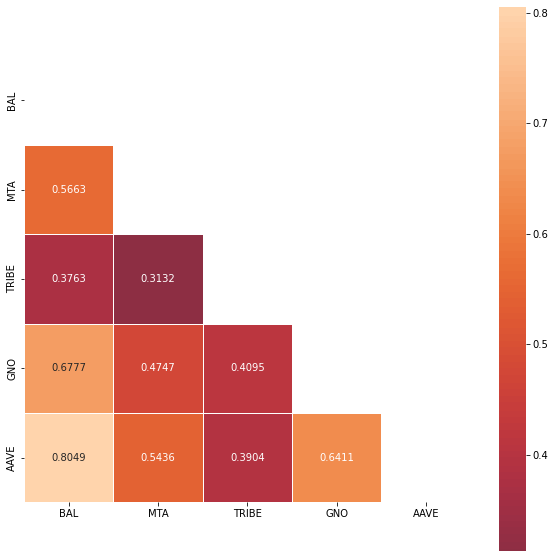

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_bal_change.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

## SocialFi Alliance Tokens Returns Correlation

In [9]:
df_sofi = df[["MATIC", "SUSHI", "DHT", "MASK", "GHST", "POOL", "REP", "QUICK", "DODO"]]
df_sofi.head()

,MATIC,SUSHI,DHT,MASK,GHST,POOL,REP,QUICK,DODO
date,,,,,,,,,
2020-01-01,0.01,NaN,NaN,NaN,NaN,NaN,8.62,NaN,NaN
2020-01-02,0.01,NaN,NaN,NaN,NaN,NaN,8.48,NaN,NaN
2020-01-03,0.02,NaN,NaN,NaN,NaN,NaN,8.82,NaN,NaN
2020-01-04,0.01,NaN,NaN,NaN,NaN,NaN,9.07,NaN,NaN
2020-01-05,0.01,NaN,NaN,NaN,NaN,NaN,9.33,NaN,NaN


In [10]:
df_sofi = df_sofi.dropna()
df_sofi.head()

,MATIC,SUSHI,DHT,MASK,GHST,POOL,REP,QUICK,DODO
date,,,,,,,,,
2021-02-17,0.11,16.21,3.06,2987.95,1.18,10.70,34.98,89.79,2.29
2021-02-18,0.12,15.81,3.32,2925.60,1.27,24.06,35.14,100.29,5.16
2021-02-19,0.15,14.54,3.19,3007.40,1.20,46.59,36.18,163.18,6.37
2021-02-20,0.14,18.35,3.37,2917.99,1.27,35.89,35.53,178.26,6.41
2021-02-21,0.16,17.34,3.37,2812.59,1.31,38.39,36.59,222.44,6.90


In [11]:
import numpy as np
# shift moves dates back by 1
df_sofi_change = df_sofi.apply(lambda x: np.log(x) - np.log(x.shift(1)))
df_sofi_change.head()

,MATIC,SUSHI,DHT,MASK,GHST,POOL,REP,QUICK,DODO
date,,,,,,,,,
2021-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-18,0.087011,-0.024986,0.081550,-0.021088,0.073502,0.810307,0.004564,0.110592,0.812385
2021-02-19,0.223144,-0.083739,-0.039944,0.027576,-0.056695,0.660835,0.029166,0.486788,0.210663
2021-02-20,-0.068993,0.232726,0.054892,-0.030181,0.056695,-0.260927,-0.018129,0.088389,0.006260
2021-02-21,0.133531,-0.056614,0.000000,-0.036789,0.031010,0.067338,0.029398,0.221414,0.073662


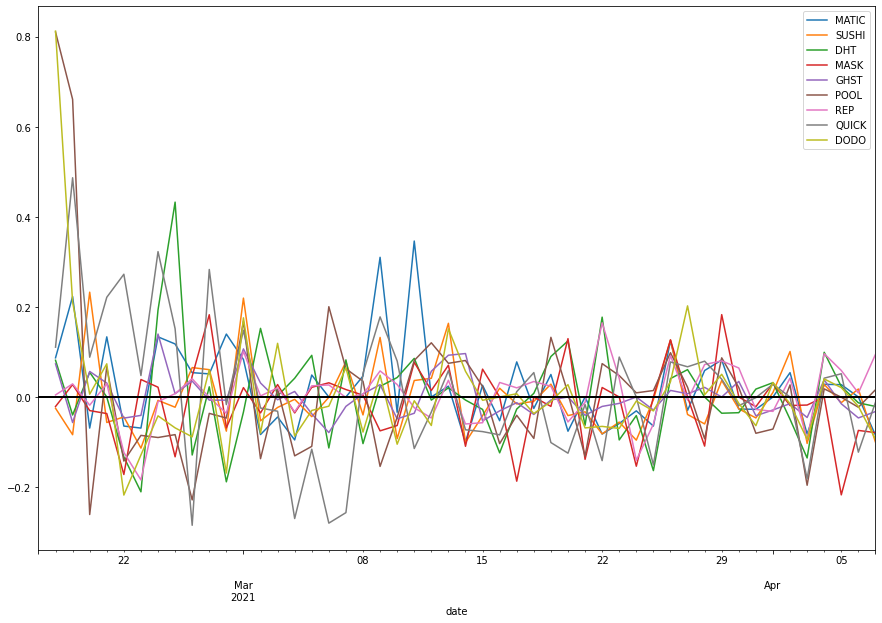

In [12]:
df_sofi_change[:50].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

/var/folders/6t/n290005x0hj3wffzdhtcr4rr0000gn/T/ipykernel_31166/3668887352.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

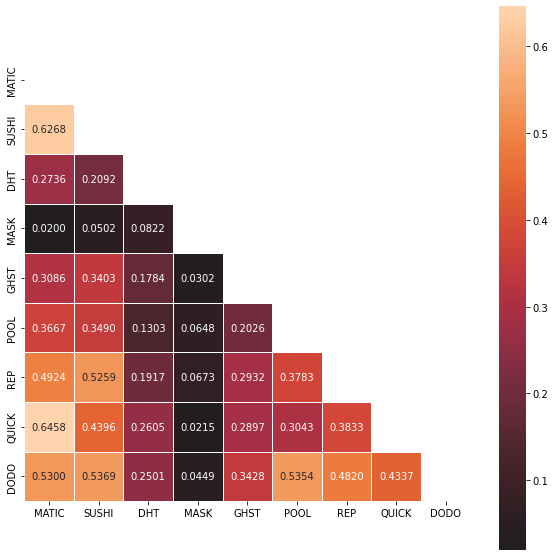

In [13]:
# Compute the correlation matrix
corr = df_sofi_change.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

## CoinGecko to Get Saber and Ratio Price Data

In [14]:
from pycoingecko import CoinGeckoAPI

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as stats
import seaborn as sns

In [16]:
coingecko = CoinGeckoAPI()

In [17]:
def get_historical_data(cryptocurrency, fiat_currency, number_of_days):
    historic_price = coingecko.get_coin_market_chart_by_id(cryptocurrency, fiat_currency, number_of_days)
    prices = [price[1] for price in historic_price['prices']]
    return prices

In [18]:
 print(get_historical_data('saber', 'USD', 5)) # test instance of CoinGeckoAPI

[0.02256167458455202, 0.022551164531183495, 0.022475542377261286, 0.022448800546714102, 0.02236761511584527, 0.02232144654281194, 0.02222064238398825, 0.02229152741075467, 0.02228880815868162, 0.022208843271401293, 0.022033845359898146, 0.022237601214532398, 0.022474183360799226, 0.022462799203089023, 0.022356058787990248, 0.02177621004733862, 0.02119699481317553, 0.02120332737082983, 0.020890092164460222, 0.021001252657497776, 0.020866249210065187, 0.021069871761663868, 0.02089062021101061, 0.020435886339857795, 0.020680017314077242, 0.02080430589727808, 0.020895575246596583, 0.02100214580963407, 0.02091194737094421, 0.02075422988073328, 0.020834952509487168, 0.02088990780458728, 0.020669470145693845, 0.020612679761302134, 0.020977196137308904, 0.02097300948914883, 0.02063194983477337, 0.02076351081008056, 0.020678205840698245, 0.020730071334964097, 0.02093066639182183, 0.020909585087330644, 0.020988632733205136, 0.02089948298543912, 0.020887728127522646, 0.02061552599422706, 0.019935

In [19]:
saber = get_historical_data('saber', 'USD', 30)

In [20]:
saber_df = pd.DataFrame(saber, columns = ['SBR'])
saber_df.index.name = 'Every Hour Count in the Past 30 Days'
saber_df.to_csv(r'Saber.csv')
sab_df = pd.read_csv("Saber.csv", index_col='Every Hour Count in the Past 30 Days')
sab_df.head()

,SBR
Every Hour Count in the Past 30 Days,
0,0.031229
1,0.031100
2,0.031186
3,0.030457
4,0.030504


In [21]:
ratio = get_historical_data('ratio-finance', 'USD', 30)

In [22]:
ratio_df = pd.DataFrame(ratio, columns = ['RATIO'])
ratio_df.index.name = 'Every Hour Count in the Past 30 Days'
ratio_df.to_csv(r'Ratio.csv')
rat_df = pd.read_csv("Ratio.csv", index_col='Every Hour Count in the Past 30 Days')
rat_df.head()

,RATIO
Every Hour Count in the Past 30 Days,
0,1.120157
1,1.120673
2,1.123985
3,1.122680
4,1.119126


In [23]:
frames = [sab_df, rat_df]
sol_df = pd.concat(frames, axis=1)
sol_df.head()

,SBR,RATIO
Every Hour Count in the Past 30 Days,,
0,0.031229,1.120157
1,0.031100,1.120673
2,0.031186,1.123985
3,0.030457,1.122680
4,0.030504,1.119126


In [24]:
# shift moves dates back by 1
sol_df_change = sol_df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
sol_df_change.head()

,SBR,RATIO
Every Hour Count in the Past 30 Days,,
0,NaN,NaN
1,-0.004147,0.000461
2,0.002770,0.002952
3,-0.023643,-0.001162
4,0.001540,-0.003171


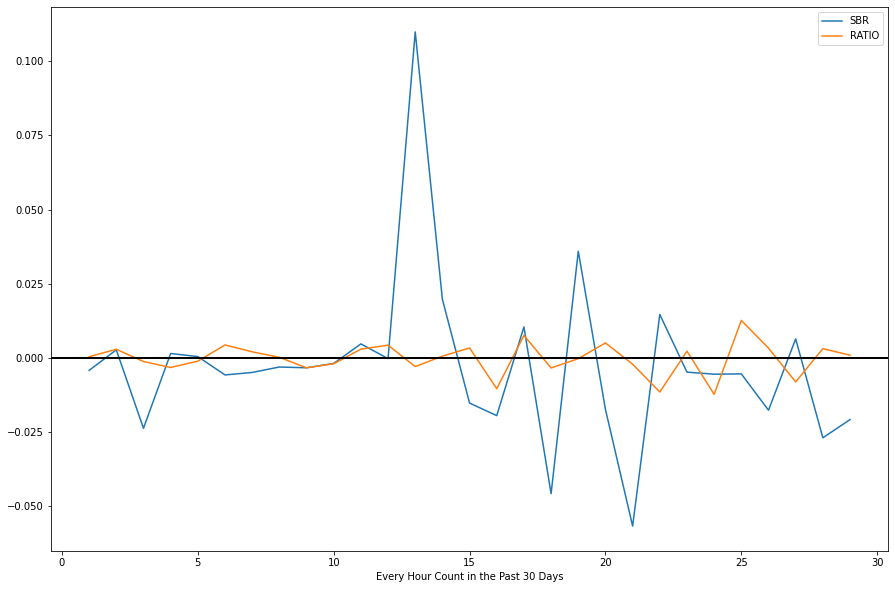

In [25]:
sol_df_change[:30].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

/var/folders/6t/n290005x0hj3wffzdhtcr4rr0000gn/T/ipykernel_31166/2316290292.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

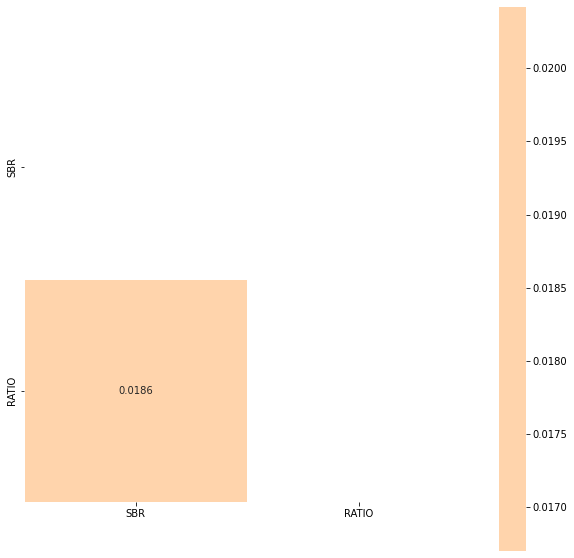

In [26]:
# Compute the correlation matrix
corr = sol_df_change.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

In [27]:
sol_df = sol_df.drop(labels=sol_df[sol_df.index % 24 != 0].index, axis=0) #  every 3rd row (mod 3)

In [28]:
# shift moves dates back by 1
sol_df_change = sol_df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
sol_df_change.head()

,SBR,RATIO
Every Hour Count in the Past 30 Days,,
0,NaN,NaN
24,-0.010536,-0.016403
48,-0.121584,0.026153
72,-0.017204,-0.006291
96,0.078571,-0.030924


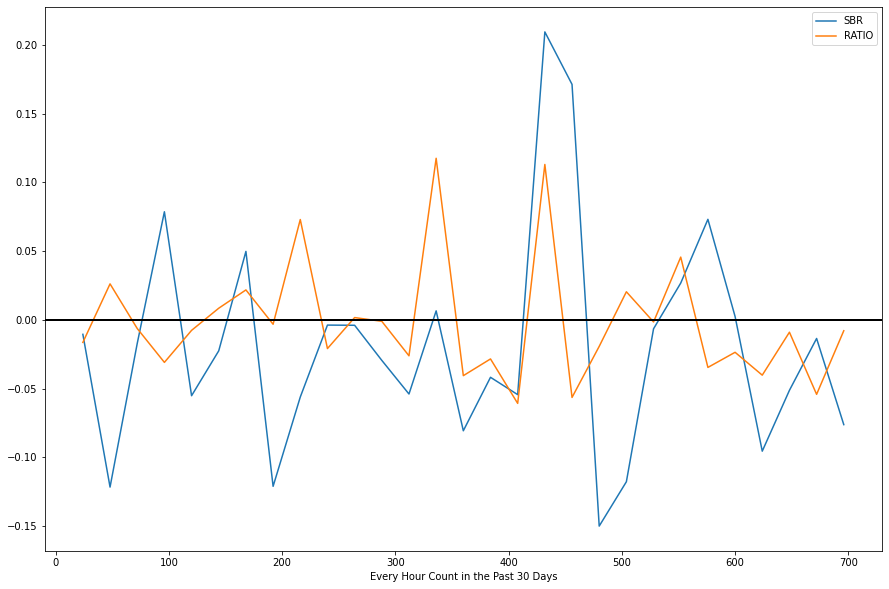

In [29]:
sol_df_change[:30].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

/var/folders/6t/n290005x0hj3wffzdhtcr4rr0000gn/T/ipykernel_31166/2316290292.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

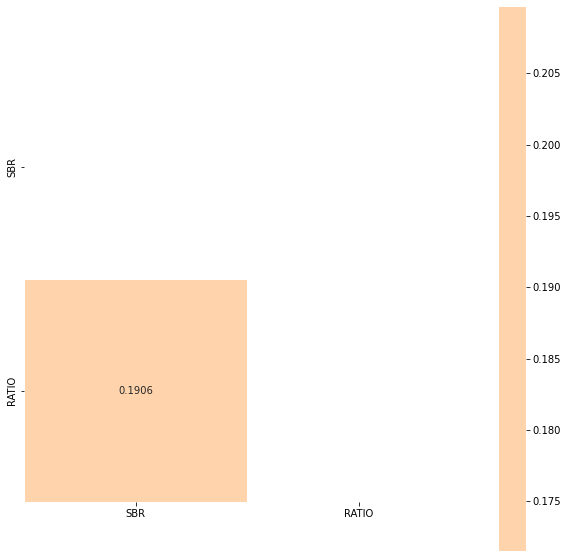

In [30]:
# Compute the correlation matrix
corr = sol_df_change.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

## Mango Markets purchase of SOL over BTC

In [31]:
btc = get_historical_data('bitcoin', 'USD', 240)

In [32]:
btc_df = pd.DataFrame(btc, columns = ['BTC'])
btc_df.index.name = 'Every Hour Count in the Past 240 Days'
btc_df.to_csv(r'Bitcoin.csv')
btc_df = pd.read_csv("Bitcoin.csv", index_col='Every Hour Count in the Past 240 Days')
btc_df.head()

,BTC
Every Hour Count in the Past 240 Days,
0,45196.488278
1,46195.218301
2,45139.833969
3,47135.431996
4,48186.532757


In [33]:
solana = get_historical_data('solana', 'USD', 240)

In [34]:
solana_df = pd.DataFrame(solana, columns = ['SOL'])
solana_df.index.name = 'Every Hour Count in the Past 240 Days'
solana_df.to_csv(r'Solana.csv')
solana_df = pd.read_csv("Solana.csv", index_col='Every Hour Count in the Past 240 Days')
solana_df.head()

,SOL
Every Hour Count in the Past 240 Days,
0,177.942402
1,174.881321
2,169.277347
3,157.377994
4,158.596340


In [35]:
mango = get_historical_data('mango-markets', 'USD', 240)

In [36]:
mango_df = pd.DataFrame(mango, columns = ['MNGO'])
mango_df.index.name = 'Every Hour Count in the Past 240 Days'
mango_df.to_csv(r'Mango.csv')
mango_df = pd.read_csv("Mango.csv", index_col='Every Hour Count in the Past 240 Days')
mango_df.head()

,MNGO
Every Hour Count in the Past 240 Days,
0,0.446123
1,0.414061
2,0.402814
3,0.353813
4,0.361266


In [37]:
frames = [btc_df, solana_df, mango_df]
df_markets = pd.concat(frames, axis=1)
df_markets.head()

,BTC,SOL,MNGO
Every Hour Count in the Past 240 Days,,,
0,45196.488278,177.942402,0.446123
1,46195.218301,174.881321,0.414061
2,45139.833969,169.277347,0.402814
3,47135.431996,157.377994,0.353813
4,48186.532757,158.596340,0.361266


In [38]:
# shift moves dates back by 1
df_markets_change = df_markets.apply(lambda x: np.log(x) - np.log(x.shift(1)))
df_markets_change.head()

,BTC,SOL,MNGO
Every Hour Count in the Past 240 Days,,,
0,NaN,NaN,NaN
1,0.021857,-0.017352,-0.074582
2,-0.023111,-0.032569,-0.027539
3,0.043260,-0.072888,-0.129707
4,0.022055,0.007712,0.020847


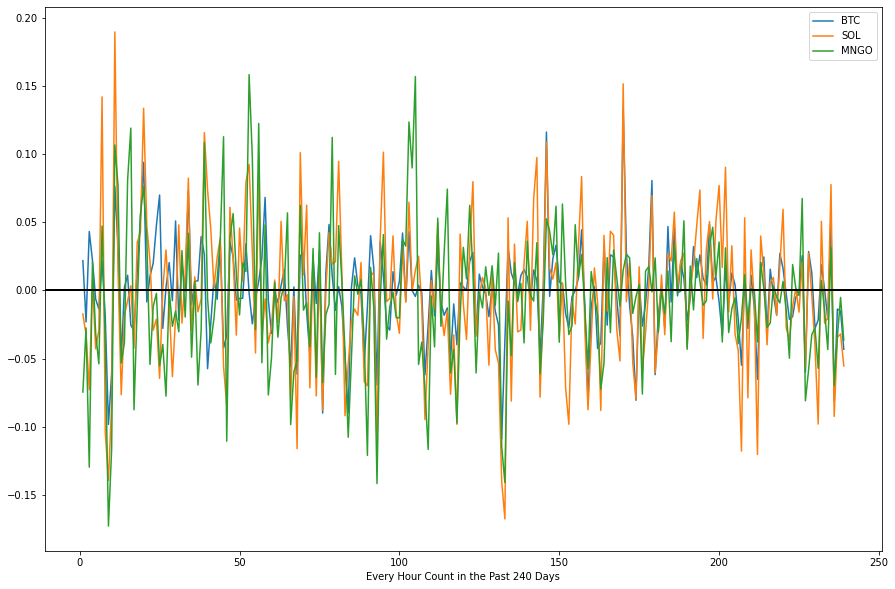

In [39]:
df_markets_change[:240].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

/var/folders/6t/n290005x0hj3wffzdhtcr4rr0000gn/T/ipykernel_31166/1417058550.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

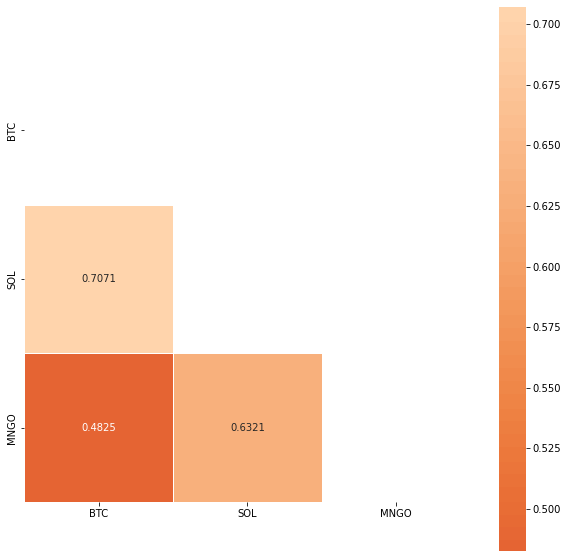

In [40]:
# Compute the correlation matrix
corr = df_markets_change.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)